In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
audio_match_test_res = pd.read_pickle("./test_results/pca90_audio_matching_results_df")
audio_mismatch_test_res = pd.read_pickle("./test_results/pca90_audio_mismatching_results_df")

In [3]:
TARGET_NAMES = ["A", "D", "F", "H", "N", "S"]

y_true_audio_match = audio_match_test_res.trues
y_pred_audio_match = audio_match_test_res.preds


y_true_audio_mismatch = audio_mismatch_test_res.trues
y_pred_audio_mismatch = audio_mismatch_test_res.preds

audio_match_report = classification_report(y_true_audio_match, y_pred_audio_match, target_names=TARGET_NAMES, output_dict=True)


audio_mismatch_report = classification_report(y_true_audio_mismatch, y_pred_audio_mismatch, target_names=TARGET_NAMES, output_dict=True)

print(audio_match_report)
print()
print(audio_mismatch_report)

{'A': {'precision': 0.8263473053892215, 'recall': 0.8961038961038961, 'f1-score': 0.8598130841121494, 'support': 154}, 'D': {'precision': 0.6764705882352942, 'recall': 0.6666666666666666, 'f1-score': 0.6715328467153284, 'support': 69}, 'F': {'precision': 0.7808219178082192, 'recall': 0.7037037037037037, 'f1-score': 0.7402597402597403, 'support': 81}, 'H': {'precision': 0.7, 'recall': 0.6363636363636364, 'f1-score': 0.6666666666666666, 'support': 66}, 'N': {'precision': 0.8818181818181818, 'recall': 0.9326923076923077, 'f1-score': 0.9065420560747663, 'support': 208}, 'S': {'precision': 0.78125, 'recall': 0.5952380952380952, 'f1-score': 0.6756756756756757, 'support': 42}, 'accuracy': 0.8096774193548387, 'macro avg': {'precision': 0.774451332208486, 'recall': 0.7384613842947175, 'f1-score': 0.7534150115840544, 'support': 620}, 'weighted avg': {'precision': 0.8058245367400372, 'recall': 0.8096774193548387, 'f1-score': 0.805882494160641, 'support': 620}}

{'A': {'precision': 0.3317535545023

In [4]:
print(classification_report(y_true_audio_match, y_pred_audio_match, target_names=TARGET_NAMES))
print(classification_report(y_true_audio_mismatch, y_pred_audio_mismatch, target_names=TARGET_NAMES))

              precision    recall  f1-score   support

           A       0.83      0.90      0.86       154
           D       0.68      0.67      0.67        69
           F       0.78      0.70      0.74        81
           H       0.70      0.64      0.67        66
           N       0.88      0.93      0.91       208
           S       0.78      0.60      0.68        42

    accuracy                           0.81       620
   macro avg       0.77      0.74      0.75       620
weighted avg       0.81      0.81      0.81       620

              precision    recall  f1-score   support

           A       0.33      0.84      0.48       501
           D       0.57      0.36      0.44       928
           F       0.48      0.28      0.35       864
           H       0.74      0.30      0.42       941
           N       0.03      0.72      0.05        47
           S       0.58      0.17      0.26      1062

    accuracy                           0.34      4343
   macro avg       0.45

In [5]:
print(classification_report(y_true_audio_match, y_pred_audio_match, target_names=TARGET_NAMES, output_dict=True))
print()
print(classification_report(y_true_audio_mismatch, y_pred_audio_mismatch, target_names=TARGET_NAMES, output_dict=True))

{'A': {'precision': 0.8263473053892215, 'recall': 0.8961038961038961, 'f1-score': 0.8598130841121494, 'support': 154}, 'D': {'precision': 0.6764705882352942, 'recall': 0.6666666666666666, 'f1-score': 0.6715328467153284, 'support': 69}, 'F': {'precision': 0.7808219178082192, 'recall': 0.7037037037037037, 'f1-score': 0.7402597402597403, 'support': 81}, 'H': {'precision': 0.7, 'recall': 0.6363636363636364, 'f1-score': 0.6666666666666666, 'support': 66}, 'N': {'precision': 0.8818181818181818, 'recall': 0.9326923076923077, 'f1-score': 0.9065420560747663, 'support': 208}, 'S': {'precision': 0.78125, 'recall': 0.5952380952380952, 'f1-score': 0.6756756756756757, 'support': 42}, 'accuracy': 0.8096774193548387, 'macro avg': {'precision': 0.774451332208486, 'recall': 0.7384613842947175, 'f1-score': 0.7534150115840544, 'support': 620}, 'weighted avg': {'precision': 0.8058245367400372, 'recall': 0.8096774193548387, 'f1-score': 0.805882494160641, 'support': 620}}

{'A': {'precision': 0.3317535545023

In [6]:
finished_responses_repeats_df = pd.read_csv("./CREMA-D/finishedResponsesWithRepeatWithPractice.csv")
voice_responses = finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==1]
voice_match_test = pd.read_pickle("./audio_tables/voice_test_split_df")
voice_match_test_files = list(voice_match_test.fileName)
voice_match_test_responses = voice_responses.loc[voice_responses.clipName.isin(voice_match_test_files)]#.dispEmo


y_true_humaudio_match = list(voice_match_test_responses.dispEmo)
y_pred_humaudio_match = list(voice_match_test_responses.respEmo)
humaudio_match_report = classification_report(y_true_humaudio_match, y_pred_humaudio_match, target_names=TARGET_NAMES, output_dict=True)

combined_voice_votes_incorrect = pd.read_pickle("./combined_voice_votes_incorrect")
voice_mismatch_responses = voice_responses.loc[voice_responses.clipName.isin(combined_voice_votes_incorrect.fileName)]
y_true_humaudio_mismatch = list(voice_mismatch_responses.dispEmo)
y_pred_humaudio_mismatch = list(voice_mismatch_responses.respEmo)
humaudio_mismatch_report = classification_report(y_true_humaudio_mismatch, y_pred_humaudio_mismatch, target_names=TARGET_NAMES, output_dict=True)


/tmp/ipykernel_4039220/89378267.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  finished_responses_repeats_df = pd.read_csv("./CREMA-D/finishedResponsesWithRepeatWithPractice.csv")


In [7]:
print(classification_report(y_true_humaudio_match, y_pred_humaudio_match, target_names=TARGET_NAMES))
print(classification_report(y_true_humaudio_mismatch, y_pred_humaudio_mismatch, target_names=TARGET_NAMES))

              precision    recall  f1-score   support

           A       0.83      0.71      0.77      1674
           D       0.44      0.56      0.50       724
           F       0.67      0.66      0.67       874
           H       0.79      0.61      0.69       725
           N       0.73      0.77      0.75      2245
           S       0.47      0.57      0.52       462

    accuracy                           0.69      6704
   macro avg       0.66      0.65      0.65      6704
weighted avg       0.71      0.69      0.69      6704

              precision    recall  f1-score   support

           A       0.28      0.21      0.24      5420
           D       0.31      0.18      0.23     10019
           F       0.27      0.16      0.20      9330
           H       0.64      0.16      0.26     10179
           N       0.01      0.33      0.01       513
           S       0.39      0.18      0.25     11478

    accuracy                           0.18     46939
   macro avg       0.32

In [8]:
print(classification_report(y_true_humaudio_match, y_pred_humaudio_match, target_names=TARGET_NAMES, output_dict=True))
print()
print(classification_report(y_true_humaudio_mismatch, y_pred_humaudio_mismatch, target_names=TARGET_NAMES, output_dict=True))

{'A': {'precision': 0.8342657342657342, 'recall': 0.7126642771804063, 'f1-score': 0.7686855670103092, 'support': 1674}, 'D': {'precision': 0.4412081984897519, 'recall': 0.5649171270718232, 'f1-score': 0.49545729860690496, 'support': 724}, 'F': {'precision': 0.6697566628041715, 'recall': 0.6613272311212814, 'f1-score': 0.6655152561888313, 'support': 874}, 'H': {'precision': 0.7921146953405018, 'recall': 0.6096551724137931, 'f1-score': 0.6890101325019485, 'support': 725}, 'N': {'precision': 0.7324598478444633, 'recall': 0.7719376391982182, 'f1-score': 0.7516807633918889, 'support': 2245}, 'S': {'precision': 0.4732142857142857, 'recall': 0.5735930735930735, 'f1-score': 0.5185909980430529, 'support': 462}, 'accuracy': 0.6891408114558473, 'macro avg': {'precision': 0.6571699040764848, 'recall': 0.649015753429766, 'f1-score': 0.6481566692904893, 'support': 6704}, 'weighted avg': {'precision': 0.7068382175851654, 'recall': 0.6891408114558473, 'f1-score': 0.6941819448464034, 'support': 6704}}


In [9]:
### ML visual responses
visual_match_test_res = pd.read_pickle("./test_results/visual_matching_results_df")
visual_mismatch_test_res = pd.read_pickle("./test_results/visual_mismatching_results_df")

y_true_visual_match = visual_match_test_res.trues
y_pred_visual_match = visual_match_test_res.preds


y_true_visual_mismatch = visual_mismatch_test_res.trues
y_pred_visual_mismatch = visual_mismatch_test_res.preds

visual_match_report = classification_report(y_true_visual_match, y_pred_visual_match, target_names=TARGET_NAMES, output_dict=True)


visual_mismatch_report = classification_report(y_true_visual_mismatch, y_pred_visual_mismatch, target_names=TARGET_NAMES, output_dict=True)


### Human visual responses

face_responses = finished_responses_repeats_df.loc[finished_responses_repeats_df.queryType==2]
face_match_test = pd.read_pickle("./face_test.pkl")
face_match_test_files = list(face_match_test.fileName)
face_match_test_responses = face_responses.loc[face_responses.clipName.isin(face_match_test_files)]


y_true_humvisual_match = list(face_match_test_responses.dispEmo)
y_pred_humvisual_match = list(face_match_test_responses.respEmo)

humvisual_match_report = classification_report(y_true_humvisual_match, y_pred_humvisual_match, target_names=TARGET_NAMES, output_dict=True)

combined_face_votes_incorrect = pd.read_pickle("./combined_face_votes_incorrect")
face_mismatch_responses = face_responses.loc[face_responses.clipName.isin(combined_face_votes_incorrect.fileName)]
y_true_humvisual_mismatch = list(face_mismatch_responses.dispEmo)
y_pred_humvisual_mismatch = list(face_mismatch_responses.respEmo)

humvisual_mismatch_report = classification_report(y_true_humvisual_mismatch, y_pred_humvisual_mismatch, target_names=TARGET_NAMES, output_dict=True)

In [10]:
print(classification_report(y_true_visual_match, y_pred_visual_match, target_names=TARGET_NAMES))
print(classification_report(y_true_visual_mismatch, y_pred_visual_mismatch, target_names=TARGET_NAMES))

              precision    recall  f1-score   support

           A       0.82      0.66      0.73       125
           D       0.91      0.85      0.88       121
           F       0.64      0.69      0.66        99
           H       0.88      0.96      0.92       182
           N       0.80      0.85      0.82       150
           S       0.69      0.67      0.68        63

    accuracy                           0.81       740
   macro avg       0.79      0.78      0.78       740
weighted avg       0.81      0.81      0.81       740

              precision    recall  f1-score   support

           A       0.45      0.35      0.40       439
           D       0.76      0.58      0.66       465
           F       0.42      0.43      0.43       615
           H       0.11      0.36      0.17        55
           N       0.09      0.62      0.15        89
           S       0.56      0.25      0.35       845

    accuracy                           0.39      2508
   macro avg       0.40

In [11]:
print(classification_report(y_true_visual_match, y_pred_visual_match, target_names=TARGET_NAMES, output_dict=True))
print()
print(classification_report(y_true_visual_mismatch, y_pred_visual_mismatch, target_names=TARGET_NAMES, output_dict=True))

{'A': {'precision': 0.8217821782178217, 'recall': 0.664, 'f1-score': 0.7345132743362832, 'support': 125}, 'D': {'precision': 0.911504424778761, 'recall': 0.8512396694214877, 'f1-score': 0.8803418803418804, 'support': 121}, 'F': {'precision': 0.6355140186915887, 'recall': 0.6868686868686869, 'f1-score': 0.6601941747572815, 'support': 99}, 'H': {'precision': 0.883248730964467, 'recall': 0.9560439560439561, 'f1-score': 0.9182058047493404, 'support': 182}, 'N': {'precision': 0.7950310559006211, 'recall': 0.8533333333333334, 'f1-score': 0.8231511254019293, 'support': 150}, 'S': {'precision': 0.6885245901639344, 'recall': 0.6666666666666666, 'f1-score': 0.6774193548387096, 'support': 63}, 'accuracy': 0.8081081081081081, 'macro avg': {'precision': 0.7892674997861989, 'recall': 0.7796920520556885, 'f1-score': 0.7823042690709041, 'support': 740}, 'weighted avg': {'precision': 0.8098833407119989, 'recall': 0.8081081081081081, 'f1-score': 0.8067003983025429, 'support': 740}}

{'A': {'precision': 

In [12]:
print(classification_report(y_true_humvisual_match, y_pred_humvisual_match, target_names=TARGET_NAMES))
print(classification_report(y_true_humvisual_mismatch, y_pred_humvisual_mismatch, target_names=TARGET_NAMES))

              precision    recall  f1-score   support

           A       0.80      0.76      0.78      1364
           D       0.67      0.73      0.70      1313
           F       0.73      0.65      0.69      1063
           H       0.95      0.89      0.92      1970
           N       0.71      0.74      0.72      1623
           S       0.56      0.63      0.59       687

    accuracy                           0.76      8020
   macro avg       0.74      0.74      0.73      8020
weighted avg       0.77      0.76      0.76      8020

              precision    recall  f1-score   support

           A       0.35      0.21      0.26      4759
           D       0.24      0.21      0.22      4987
           F       0.34      0.18      0.24      6657
           H       0.14      0.24      0.18       604
           N       0.03      0.32      0.06       968
           S       0.29      0.17      0.21      9087

    accuracy                           0.19     27062
   macro avg       0.23

In [13]:
print(classification_report(y_true_humvisual_match, y_pred_humvisual_match, target_names=TARGET_NAMES, output_dict=True))
print()
print(classification_report(y_true_humvisual_mismatch, y_pred_humvisual_mismatch, target_names=TARGET_NAMES, output_dict=True))

{'A': {'precision': 0.7984555984555984, 'recall': 0.7580645161290323, 'f1-score': 0.7777359909740504, 'support': 1364}, 'D': {'precision': 0.6671309192200557, 'recall': 0.7296268088347296, 'f1-score': 0.6969807202619134, 'support': 1313}, 'F': {'precision': 0.7331223628691983, 'recall': 0.6538099717779868, 'f1-score': 0.6911984087518648, 'support': 1063}, 'H': {'precision': 0.9478214093598709, 'recall': 0.8944162436548223, 'f1-score': 0.920344737529381, 'support': 1970}, 'N': {'precision': 0.7076470588235294, 'recall': 0.7412199630314233, 'f1-score': 0.7240445380680108, 'support': 1623}, 'S': {'precision': 0.5575447570332481, 'recall': 0.6346433770014556, 'f1-score': 0.5936010891763105, 'support': 687}, 'accuracy': 0.7591022443890274, 'macro avg': {'precision': 0.7352870176269168, 'recall': 0.7352968134049083, 'f1-score': 0.733984247460255, 'support': 8020}, 'weighted avg': {'precision': 0.765972319943978, 'recall': 0.7591022443890274, 'f1-score': 0.7614362658824335, 'support': 8020}}


In [14]:
import matplotlib.pyplot as plt

def plot_human_ml_classreport_metric(
    hum_class_report,
    ml_class_report,
    target_names=["A", "D", "F", "H", "N", "S"],
    model_name="SVM",
):
    metric_report = pd.DataFrame({})
    for metric in ["precision", "recall", "f1-score"]:
        human_metric_report = pd.DataFrame({
            "emotion":target_names,
            "percentage": [hum_class_report[class_name][metric] for class_name in TARGET_NAMES],
            "type": ["Human" for _ in TARGET_NAMES],
            "metric": [metric for _ in TARGET_NAMES]
        })

        ml_metric_report = pd.DataFrame({
            "emotion":TARGET_NAMES,
            "percentage": [ml_class_report[class_name][metric] for class_name in TARGET_NAMES],
            "type": [model_name for _ in TARGET_NAMES],
            "metric": [metric for _ in TARGET_NAMES]
        })
        if len(metric_report) == 0:
            metric_report = pd.concat([human_metric_report, ml_metric_report])
        else:
            new_metric_report = pd.concat([human_metric_report, ml_metric_report])
            metric_report = pd.concat([metric_report, new_metric_report])
    fig = plt.figure()
    fig.set_figwidth(15)

    
    ax1 = fig.add_subplot(131)
    g = sns.barplot(x="emotion", y="percentage", hue="type", data=metric_report.loc[metric_report.metric=="precision"], ax=ax1).set(
        ylabel="precision"
    )
    ax1.axhline(hum_class_report["macro avg"]["precision"], ls='--',c='green', label="Human avg")
    ax1.axhline(ml_class_report["macro avg"]["precision"], ls='--',c='red', label=f'{model_name} avg')
#     plt.legend()
    ax1.get_legend().remove()
    
    ax2 = fig.add_subplot(132)
    g = sns.barplot(x="emotion", y="percentage", hue="type", data=metric_report.loc[metric_report.metric=="recall"], ax=ax2).set(
        ylabel="recall"
    )
    ax2.axhline(hum_class_report["macro avg"]["recall"], ls='--',c='green', label="Human avg")
    ax2.axhline(ml_class_report["macro avg"]["recall"], ls='--',c='red', label=f'{model_name} avg')
#     plt.legend()
    ax2.get_legend().remove()
        
    ax3 = fig.add_subplot(133)
    g = sns.barplot(x="emotion", y="percentage", hue="type", data=metric_report.loc[metric_report.metric=="f1-score"], ax=ax3).set(
        ylabel="f1-score"
    )
    ax3.axhline(hum_class_report["macro avg"]["f1-score"], ls='--',c='green', label="Human avg")
    ax3.axhline(ml_class_report["macro avg"]["f1-score"], ls='--',c='red', label=f'{model_name} avg')
    
    plt.legend()


    plt.tight_layout()

## Audio Plots

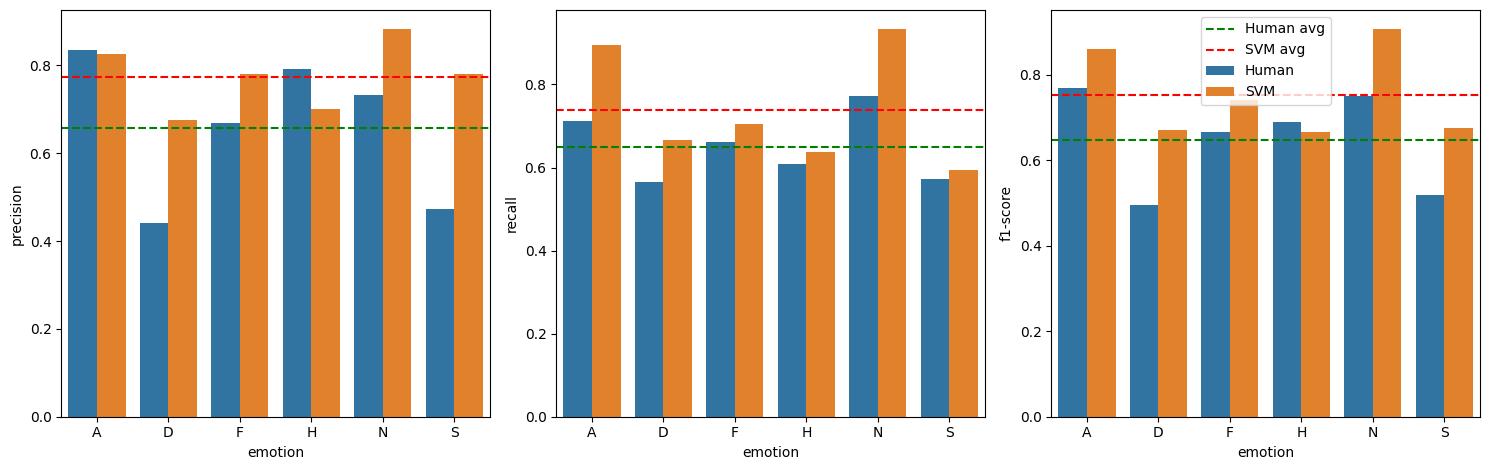

In [15]:
plot_human_ml_classreport_metric(
    humaudio_match_report,
    audio_match_report,
    TARGET_NAMES,
    "SVM"
)

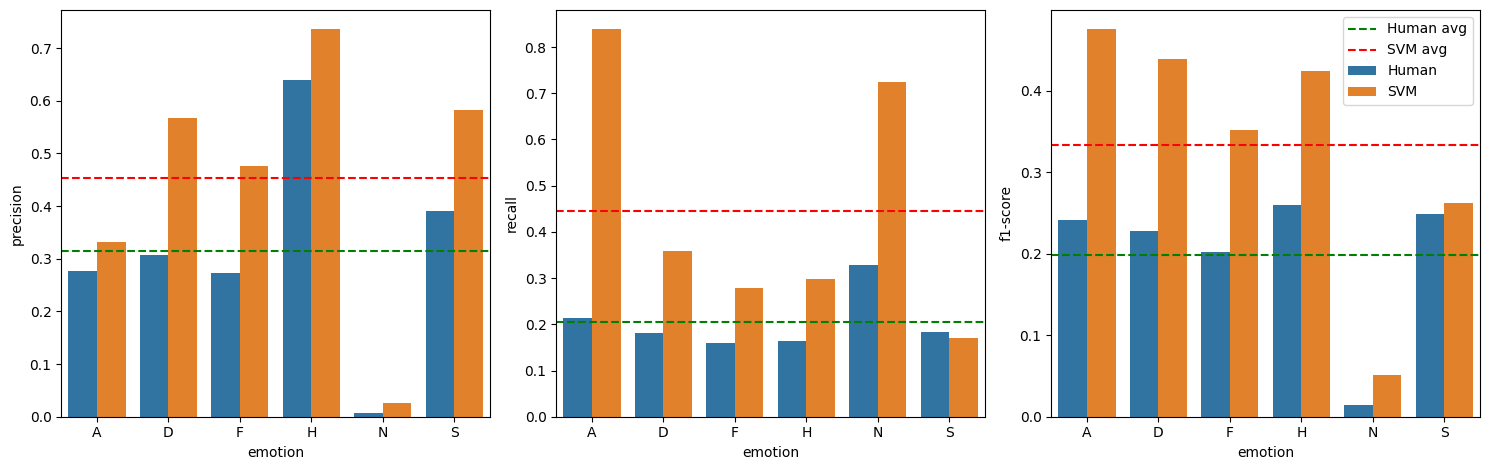

In [16]:
plot_human_ml_classreport_metric(
        humaudio_mismatch_report,
        audio_mismatch_report,
        TARGET_NAMES,
        "SVM"
    )

## Visual Plots

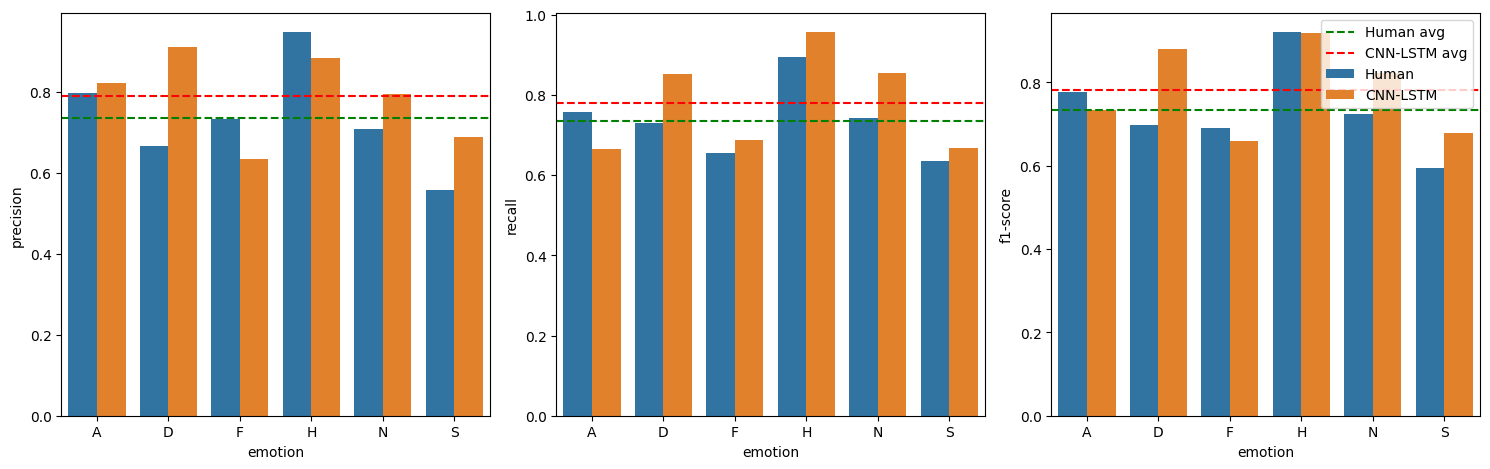

In [17]:
plot_human_ml_classreport_metric(
    humvisual_match_report,
    visual_match_report,
    TARGET_NAMES,
    "CNN-LSTM"
)

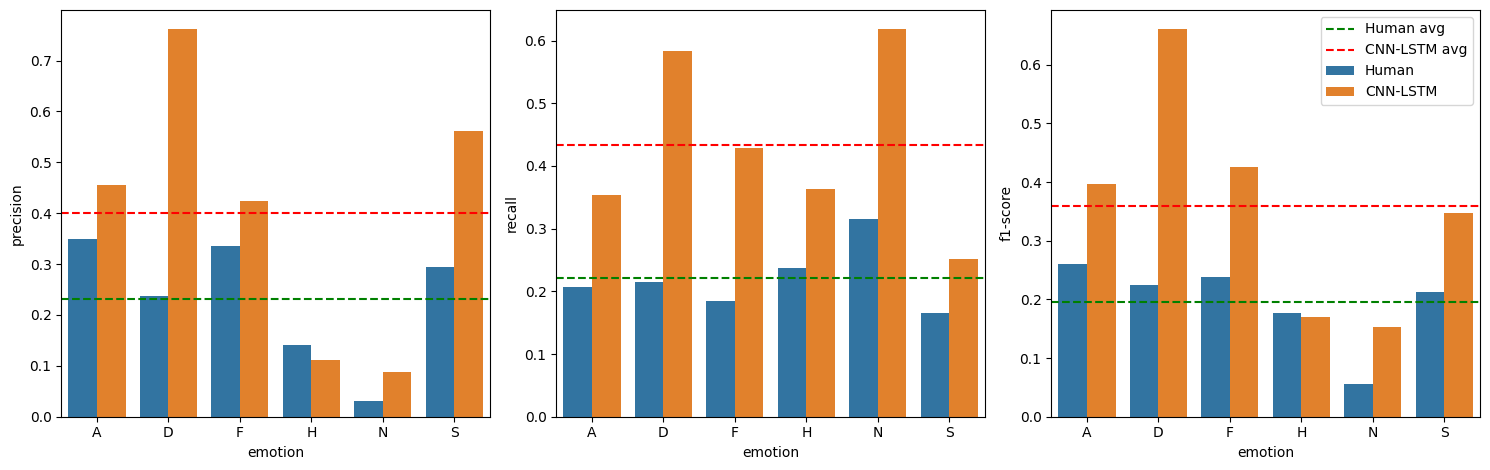

In [18]:
plot_human_ml_classreport_metric(
    humvisual_mismatch_report,
    visual_mismatch_report,
    TARGET_NAMES,
    "CNN-LSTM"
)

## Classes most commonly misclassified as neutral

In [19]:
audio_match_test_res

,preds,trues
0,D,A
1,F,A
2,F,F
3,N,N
4,N,N
...,...,...
615,F,F
616,A,D
617,N,F
618,A,A


In [20]:
TARGET_NAMES

['A', 'D', 'F', 'H', 'N', 'S']

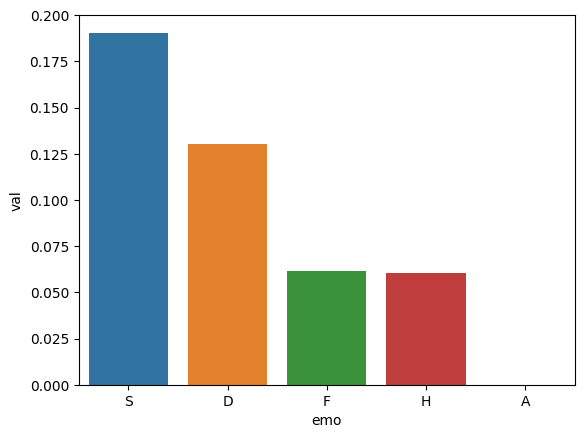

In [21]:
def plot_neutral_miscl_singl(preds_trues_res):
    neutral_idx = TARGET_NAMES.index("N")
    conf_matrix = confusion_matrix(preds_trues_res.trues, preds_trues_res.preds, labels=TARGET_NAMES, normalize='true')
    neutral_preds = conf_matrix[:, neutral_idx]
    neutral_miscl_df = pd.DataFrame(zip(TARGET_NAMES, neutral_preds), columns=["emo", "val"])
    neutral_miscl_df = neutral_miscl_df.loc[neutral_miscl_df.emo!="N"].sort_values(by=['val'], ascending=False)
    sns.barplot(neutral_miscl_df, x="emo", y="val")

plot_neutral_miscl_singl(audio_match_test_res)

In [22]:
audio_match_test_res

,preds,trues
0,D,A
1,F,A
2,F,F
3,N,N
4,N,N
...,...,...
615,F,F
616,A,D
617,N,F
618,A,A


In [23]:
pd.DataFrame(zip(y_pred_humaudio_match, y_true_humaudio_match), columns=["preds", "trues"])

,preds,trues
0,N,H
1,N,H
2,H,H
3,D,D
4,A,A
...,...,...
6699,D,N
6700,N,N
6701,N,N
6702,N,N


In [24]:
def plot_neutral_miscl(ml_preds_trues_res, hmn_preds_trues_res, model_name="SVM"):
    neutral_idx = TARGET_NAMES.index("N")
    
    def get_neutral_misc_df(preds_trues_res, type_name="SVM"):
        conf_matrix = confusion_matrix(preds_trues_res.trues, preds_trues_res.preds, labels=TARGET_NAMES, normalize='true')
        neutral_preds = conf_matrix[:, neutral_idx]
        neutral_miscl_df = pd.DataFrame(zip(TARGET_NAMES, neutral_preds), columns=["emotion", "percentage"])
        neutral_miscl_df = neutral_miscl_df.loc[neutral_miscl_df.emotion!="N"].sort_values(by=['percentage'], ascending=False)
        neutral_miscl_df["type"] = [type_name for _ in range(5)]
        return neutral_miscl_df
    ml_neutral_miscl_df = get_neutral_misc_df(ml_preds_trues_res, model_name)
    hmn_neutral_miscl_df = get_neutral_misc_df(hmn_preds_trues_res, "Human")
    comb_neutral_miscl_df = pd.concat([hmn_neutral_miscl_df, ml_neutral_miscl_df])
    sns.barplot(x="emotion", y="percentage", hue="type", data=comb_neutral_miscl_df)

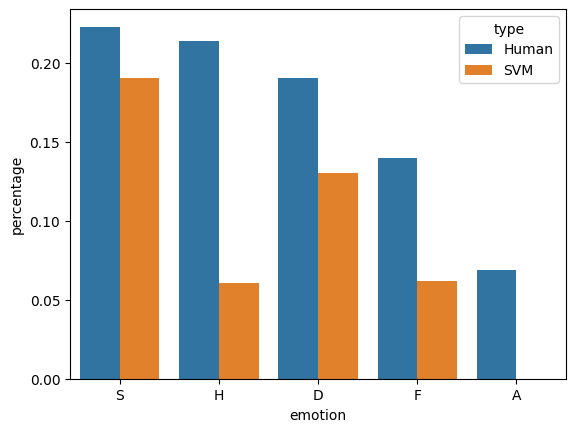

In [25]:
plot_neutral_miscl(
    audio_match_test_res,
    pd.DataFrame(zip(y_pred_humaudio_match, y_true_humaudio_match), columns=["preds", "trues"])
)

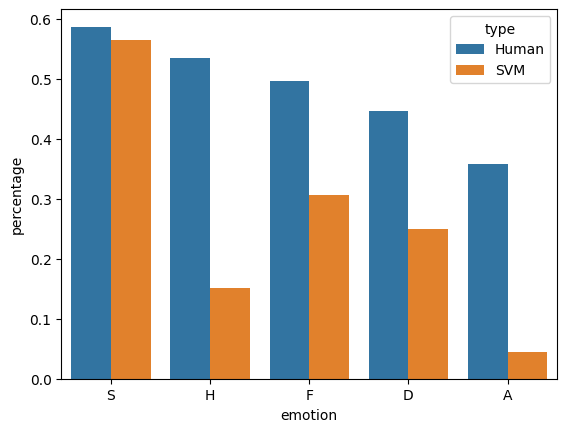

In [26]:
plot_neutral_miscl(
    audio_mismatch_test_res,
    pd.DataFrame(zip(y_pred_humaudio_mismatch, y_true_humaudio_mismatch), columns=["preds", "trues"])
)

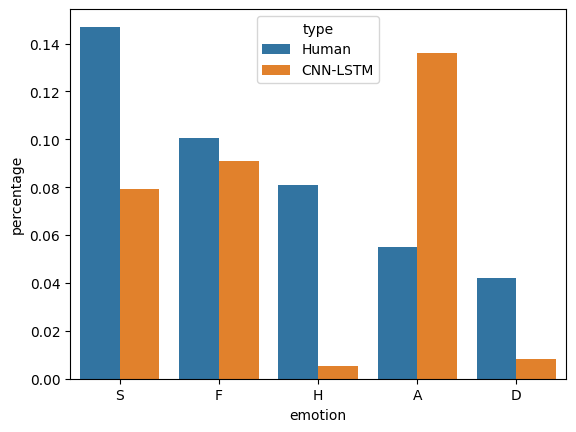

In [27]:
plot_neutral_miscl(
    visual_match_test_res,
    pd.DataFrame(zip(y_pred_humvisual_match, y_true_humvisual_match), columns=["preds", "trues"]),
    "CNN-LSTM"
)

In [ ]:
plot_neutral_miscl(
    visual_mismatch_test_res,
    pd.DataFrame(zip(y_pred_humvisual_mismatch, y_true_humvisual_mismatch), columns=["preds", "trues"]),
    "CNN-LSTM"
)